In [1]:
# !pip install pymannkendall
# !pip install pyhomogeneity

In [2]:
#!pip install yfinance

In [3]:
import pandas as pd
from datetime import date
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import pymannkendall as mk
import pyhomogeneity as hg
import matplotlib.pyplot as plt
import glob

In [4]:
empresas = [
'BMOB3',
]

In [5]:
len(empresas)

1

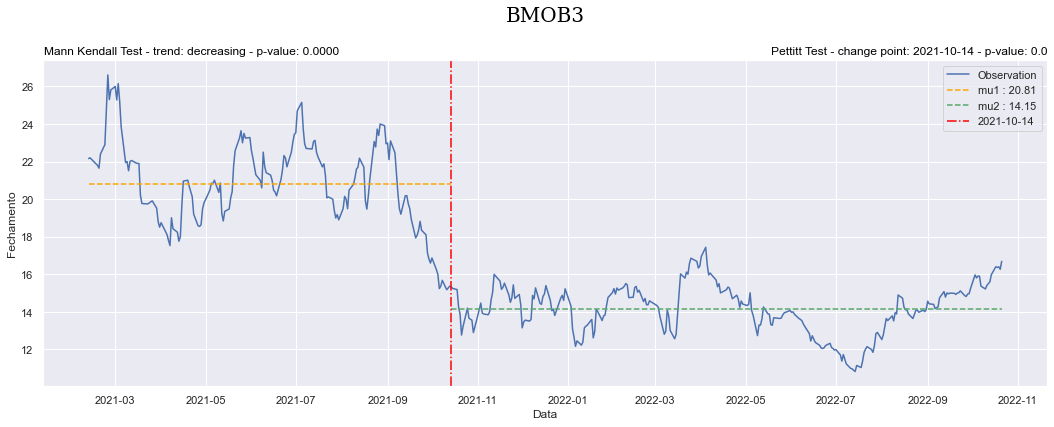

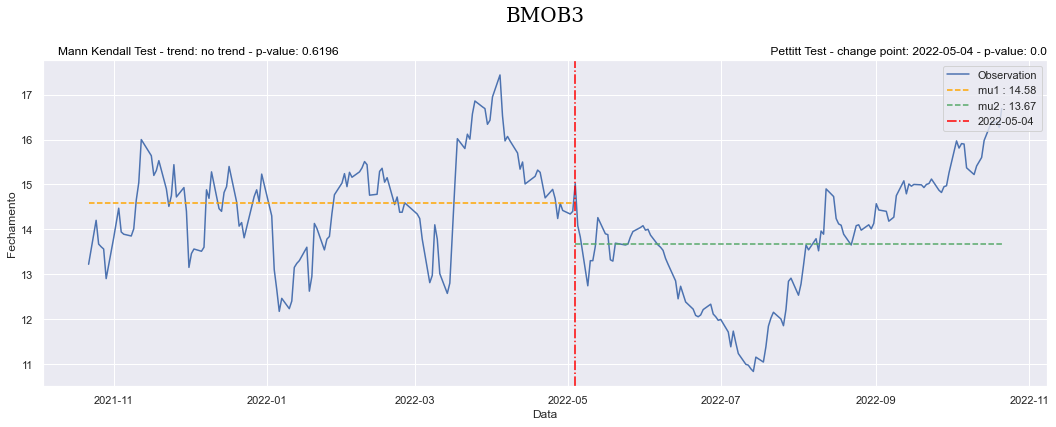

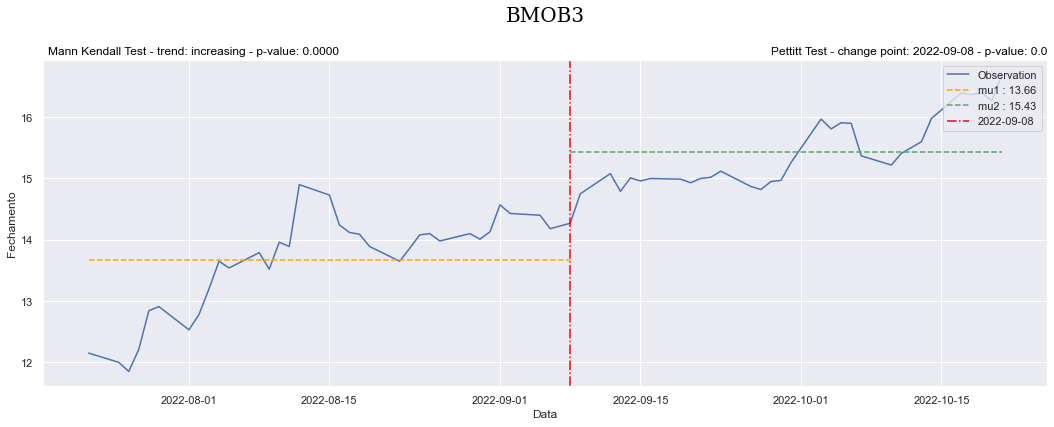

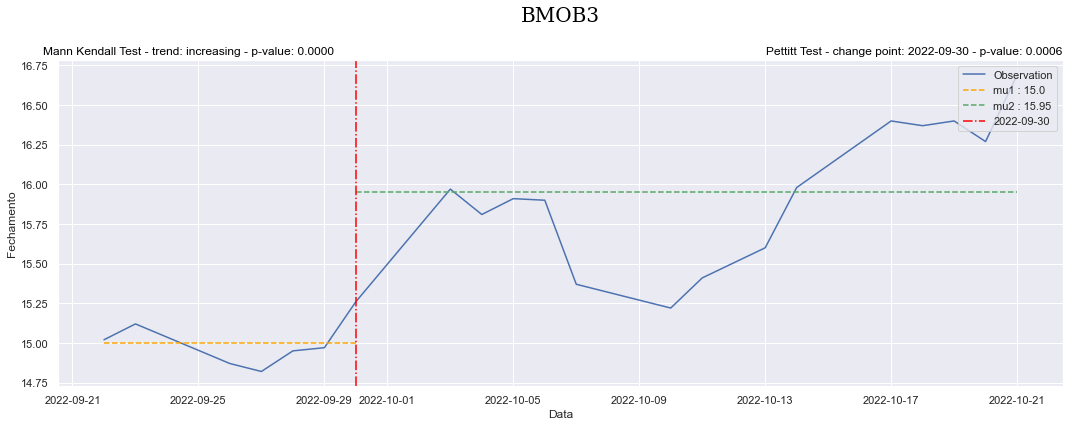

In [6]:
START_LIST = ['2019-10-22', '2021-10-22','2022-7-22','2022-09-22']
END = '2022-10-22'

for START in START_LIST:
    df = pd.DataFrame(columns=['Date','Open','High','Low','Close','Adj Close','Volume', 'Empresa'])
    for codigo in empresas:
        #plt.clf()
        df_aux = yf.download(codigo+'.SA', 
                              start=START, 
                              end=END,
                              progress=False,
        )
        df_aux = df_aux.reset_index(level=0)
        df_aux['Empresa'] = codigo
        #sns.set_theme(style="darkgrid")

        #sns.lineplot(data=df_aux, x="Date", y="Close").set(title=codigo);
        #plt.xticks(rotation=45)
        #sns.set(rc={'figure.figsize':(11.7,6.27)})
        #plt.savefig(codigo+'.png')
        #aux_var = df_aux.Close[0]
        #df_aux['Variação']=df_aux['Close']/aux_var -1
        
        df = pd.concat([df,df_aux])
    df[['Date']] = df[['Date']].apply(pd.to_datetime)

    df_results = pd.DataFrame(columns=['Empresa', 'MK-trend','MK-h','MK-p','PTT-change','PTT-h', 'PTT-p', 'PTT-mu1', 'PTT-mu2'])

    sns.set_theme(style="darkgrid")

    for codigo in empresas:
        df_aux = df[df['Empresa'] == codigo][['Date', 'Close']].copy()

        df_aux.index = df_aux['Date']

        df_aux = df_aux[['Close']].astype(float)

        result_mk = mk.original_test(df_aux)
        result_pettitt = hg.pettitt_test(df_aux)

        df_results = df_results.append({'Empresa':codigo, 'MK-trend':result_mk.trend
                                        ,'MK-h':result_mk.h,'MK-p':result_mk.p,'PTT-change':result_pettitt.cp,'PTT-h':result_pettitt.h, 
                                        'PTT-p':result_pettitt.p, 'PTT-mu1':result_pettitt.avg[0], 'PTT-mu2':result_pettitt.avg[1]}, ignore_index=True)
        titulo =  codigo

        mn = df_aux.index[0]
        mx = df_aux.index[-1]

        loc = pd.to_datetime(result_pettitt.cp)
        mu1 = result_pettitt.avg.mu1
        mu2 = result_pettitt.avg.mu2

        plt.figure(figsize=(18,6))
        plt.plot(df_aux, label="Observation")
        plt.hlines(mu1, xmin=mn, xmax=loc, linestyles='--', colors='orange',lw=1.5, label='mu1 : ' + str(round(mu1,2)))
        plt.hlines(mu2, xmin=loc, xmax=mx, linestyles='--', colors='g', lw=1.5, label='mu2 : ' + str(round(mu2,2)))
        plt.axvline(x=loc, linestyle='-.' , color='red', lw=1.5, label= result_pettitt.cp)

        plt.title('Mann Kendall Test - trend: '+result_mk.trend+' - p-value: '+str("%.4f"%round(result_mk.p,4))
                 +' '*128 +'Pettitt Test - change point: '+result_pettitt.cp+ ' - p-value: ' + str(round(result_pettitt.p,4)),fontdict={'color':'black','size':12},loc = 'right')
        plt.title(titulo ,fontdict={'family':'serif','color':'black','size':20},y=1.1)
        plt.xlabel('Data')
        plt.ylabel('Fechamento')
        plt.legend(loc='upper right');
        plt.savefig('./Resultados/'+codigo+' '+START+' '+END+'.jpg',bbox_inches='tight', dpi = 300);
        #df_results.sort_values(by=['MK-p'])

In [7]:
df_results

,Empresa,MK-trend,MK-h,MK-p,PTT-change,PTT-h,PTT-p,PTT-mu1,PTT-mu2
0,BMOB3,increasing,True,0.000031,2022-09-30,True,0.0006,15.001429,15.95
